In [1]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

C:\Users\sures\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
t1 = tf.constant([
    [1,2,3],
    [4,5,6],
    [7,8,9],
],dtype = tf.float32)
ds1 = tf.data.Dataset.from_tensors(t1)
ds2 = tf.data.Dataset.from_tensor_slices(t1)

In [3]:
for element in ds1:
    print(element)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]], shape=(3, 3), dtype=float32)


In [4]:
for element in ds2:
    print(element)

tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)
tf.Tensor([4. 5. 6.], shape=(3,), dtype=float32)
tf.Tensor([7. 8. 9.], shape=(3,), dtype=float32)


In [5]:
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar = True
)
flowers_root = pathlib.Path(flowers_root)

228813984/228813984 [==============================] - 190s 1us/step


In [6]:
for item in flowers_root.glob("*"):
    print(item)

C:\Users\sures\.keras\datasets\flower_photos\daisy
C:\Users\sures\.keras\datasets\flower_photos\dandelion
C:\Users\sures\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\sures\.keras\datasets\flower_photos\roses
C:\Users\sures\.keras\datasets\flower_photos\sunflowers
C:\Users\sures\.keras\datasets\flower_photos\tulips


In [7]:
file_path_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

In [8]:
def parse_image(filename):
    label = tf.strings.split(filename, os.sep)[-2]
    image = tf.io.read_file(filename)
    image = tf.io.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [128, 128])
    return image, label

In [9]:
image_ds = file_path_ds.map(parse_image)

In [10]:
def show(image, label):
    plt.imshow(image)
    plt.title(label.numpy().decode("utf-8"))
    plt.axis("off")
    plt.show()

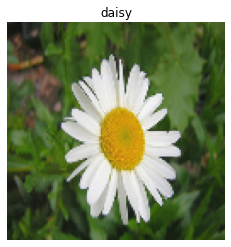

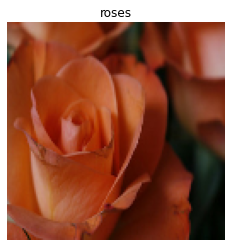

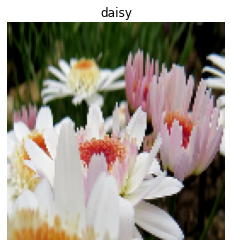

In [11]:
for image, label in image_ds.take(3):
    show(image, label)

In [13]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, label = train
images = images/255.0
labels = label.astype(np.int32)

In [15]:
fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [16]:
model.fit(fmnist_train_ds, epochs = 2)

Epoch 1/2


1875/1875 [==============================] - 5s 2ms/step - loss: 0.6052 - accuracy: 0.7956
Epoch 2/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4623 - accuracy: 0.8416


In [17]:
loss, accuracy = model.evaluate(fmnist_train_ds)
print("Loss:",loss)
print("Accuracy:",accuracy)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4542 - accuracy: 0.8425
Loss: 0.4542059600353241
Accuracy: 0.8425499796867371


In [18]:
predict_ds = tf.data.Dataset.from_tensor_slices(images).batch(32)
result = model.predict(predict_ds, steps=10)
print(result.shape)

10/10 [==============================] - 0s 3ms/step
(320, 10)
